# Predicting Healthiness Of Components Of Power System using Machine Learning



Emma Luk MSc(Computer Science, Bristol) MSc(Data Science, London) Certified Scrum Master® MIET
Data Scientist
BAE Systems Maritime Services


T: +44(0) 3300 486375  |  M: +44 (0)7974 522 805 
E: emma.luk@baesystems.com 
 


## Agile Data Science Capability Framework

### Data-Driven Scrum™ (DDS)

It is an agile framework specifically designed for data science teams. In short, DDS aims to improve a data science team’s collaboration and communication.

The Data Science Process Alliance created Data Driven Scrum to address the fact that other well-known agile approaches (such as often Scrum and Kanban) often fail to accommodate the unique needs of data science projects.

### DDS Roles

Similar to Scrum, there are three key roles in DDS:

- Product Owner: The Product Owner in DDS is the empowered central point of product leadership (“voice of the client”) – the person who decides on the Product Increments, prioritises which features and functionality to build, the order in which to build them, and what aspects of them to observe and analyse. In short, the Product Owner owns the Backlog and prioritises its Items, ensuring that each Item is clearly defined, and that the upcoming work and priorities of the team are visible and transparent.

- Process Expert: The Process Expert acts as a coach, facilitator, and impediment remover. The Process Expert also helps the team understand and embrace the DDS values, principles, and practices to aid the organisation in obtaining exceptional results from applying DDS.

- DDS Team Members: Similar to Scrum, each DDS team is a group of typically three to nine people. The DDS team is comprised of a cross-functional collection of DDS Team Members (ex. Data Scientists, Software Engineers, …) that have all the skills needed to create artifacts (ex. models) to answer the questions / experiments (i.e., to design, build, test and deploy the desired product). Both the Product Owner and the Process Expert are part of the DDS Team and may contribute to creating, observing and analysing throughout an iteration. The team self-organises to determine the best way to accomplish the goal defined by the Product Owner.

### Research Question: Predicting Healthiness Of Components Of Power System using Machine Learning

- What kinds of trends are in the data?
- What kinds of predictions are possible?
- What conclusions can we make?

### import the basic libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

### convert our dataset into pandas dataframe

In [2]:
data = pd.read_csv('data1.csv')

### Extract First and Last 10 rows of our dataset

In [3]:
data.head(10)

,ComponentAge,MonthlyRunTime,Location,FlowRate,OPXVolume,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target
0,0.55,9.50,B,0.99740,NaN,32.0,10.0,1.90,0.58,3.13,0.22,0.080,9.0,0
1,0.32,12.70,A,0.99184,NaN,28.0,6.9,10.55,0.3,3.07,0.30,0.037,4.0,0
2,0.57,9.70,B,0.99743,NaN,86.0,7.2,2.30,0.66,3.53,0.03,0.078,16.0,0
3,0.50,9.50,B,0.99593,NaN,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0
4,0.44,10.80,A,0.99280,NaN,127.0,7.0,4.90,0.29,3.17,0.37,0.034,26.0,0
5,0.41,10.60,A,0.99300,NaN,76.0,7.0,2.10,0.22,3.20,0.33,0.052,15.0,0
6,0.76,10.00,A,0.99660,NaN,110.0,7.7,7.70,0.39,3.33,0.49,0.036,11.0,0
7,0.50,9.55,A,0.99494,NaN,170.0,6.6,8.10,0.34,3.15,0.40,0.046,68.0,0
8,0.30,11.90,A,0.99200,NaN,138.0,7.3,6.85,0.33,3.03,0.40,0.038,32.0,1
9,0.50,9.80,A,0.99345,NaN,109.0,6.4,1.50,0.16,3.38,0.37,0.037,27.0,0


In [4]:
data.tail(10)

,ComponentAge,MonthlyRunTime,Location,FlowRate,OPXVolume,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target
6487,0.50,11.066667,A,0.99332,NaN,143.0,5.7,7.30,0.31,3.31,0.29,0.050,33.0,0
6488,0.40,11.200000,A,0.99184,NaN,145.0,6.2,5.25,0.36,3.22,0.22,0.038,44.0,0
6489,0.62,9.800000,A,0.99382,NaN,134.0,7.7,2.00,0.31,3.11,0.23,0.069,29.0,0
6490,0.55,12.300000,B,0.99506,NaN,9.0,8.2,2.30,0.32,3.27,0.42,0.098,3.0,0
6491,0.31,9.400000,A,0.99330,NaN,69.0,5.8,1.80,0.23,3.38,0.27,0.043,24.0,0
6492,0.35,9.200000,A,0.99240,NaN,30.0,5.6,0.80,0.29,3.36,0.05,0.038,11.0,0
6493,0.74,11.500000,B,0.99780,NaN,14.0,11.6,3.65,0.53,3.05,0.66,0.121,6.0,1
6494,0.47,10.000000,A,0.99480,NaN,159.0,7.2,1.80,0.15,3.52,0.39,0.043,21.0,0
6495,0.53,10.500000,B,0.99860,3.0,21.0,11.1,3.10,0.35,3.17,0.48,0.090,5.0,0
6496,0.36,10.000000,A,0.99272,NaN,95.0,8.5,1.10,0.18,2.83,0.30,0.028,34.0,0


In [5]:
data.shape

(6497, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ComponentAge          6493 non-null   float64
 1   MonthlyRunTime        6497 non-null   float64
 2   Location              6497 non-null   object 
 3   FlowRate              6497 non-null   float64
 4   OPXVolume             805 non-null    float64
 5   MaxOutputRate         6497 non-null   float64
 6   Sensor1               6487 non-null   float64
 7   Sensor2               6495 non-null   float64
 8   Sensor3               6497 non-null   object 
 9   Sensor4               6488 non-null   float64
 10  Sensor5               6494 non-null   float64
 11  Sensor5.1             6495 non-null   float64
 12  DaysSinceMaintenance  6497 non-null   float64
 13  Target                6497 non-null   int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


# Exploratory Data Analysis (EDA)

In [7]:
# check NULL values
data.isnull().sum()

ComponentAge               4
MonthlyRunTime             0
Location                   0
FlowRate                   0
OPXVolume               5692
MaxOutputRate              0
Sensor1                   10
Sensor2                    2
Sensor3                    0
Sensor4                    9
Sensor5                    3
Sensor5.1                  2
DaysSinceMaintenance       0
Target                     0
dtype: int64

In [8]:
# Converted string value to numeric value(label-encoding)

data['Location']=data['Location'].map({'A':0,'B':1})

In [9]:
data.head()

,ComponentAge,MonthlyRunTime,Location,FlowRate,OPXVolume,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target
0,0.55,9.5,1,0.99740,NaN,32.0,10.0,1.90,0.58,3.13,0.22,0.080,9.0,0
1,0.32,12.7,0,0.99184,NaN,28.0,6.9,10.55,0.3,3.07,0.30,0.037,4.0,0
2,0.57,9.7,1,0.99743,NaN,86.0,7.2,2.30,0.66,3.53,0.03,0.078,16.0,0
3,0.50,9.5,1,0.99593,NaN,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0
4,0.44,10.8,0,0.99280,NaN,127.0,7.0,4.90,0.29,3.17,0.37,0.034,26.0,0


In [10]:
# Converted Sensor3 data from object to numeric

data['Sensor3'] = pd.to_numeric(data['Sensor3'], errors='coerce')

### Rechecking the updated values and data types

In [11]:
# display all information of my data frame 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ComponentAge          6493 non-null   float64
 1   MonthlyRunTime        6497 non-null   float64
 2   Location              6497 non-null   int64  
 3   FlowRate              6497 non-null   float64
 4   OPXVolume             805 non-null    float64
 5   MaxOutputRate         6497 non-null   float64
 6   Sensor1               6487 non-null   float64
 7   Sensor2               6495 non-null   float64
 8   Sensor3               6489 non-null   float64
 9   Sensor4               6488 non-null   float64
 10  Sensor5               6494 non-null   float64
 11  Sensor5.1             6495 non-null   float64
 12  DaysSinceMaintenance  6497 non-null   float64
 13  Target                6497 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 710.7 KB


### basic descriptive statistical analysis of our DataSet.

In [12]:
# Pandas DataFrame.transpose() function transpose index and columns of the dataframe. 
# It reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ComponentAge,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000
MonthlyRunTime,6497.0,10.491801,1.192712,8.00000,9.50000,10.30000,11.30000,14.90000
Location,6497.0,0.246114,0.430779,0.00000,0.00000,0.00000,0.00000,1.00000
FlowRate,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
OPXVolume,805.0,5.631056,3.403142,0.00000,3.00000,6.00000,9.00000,11.00000
MaxOutputRate,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
Sensor1,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
Sensor2,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
Sensor3,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
Sensor4,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000


In [13]:
data.corr()

,ComponentAge,MonthlyRunTime,Location,FlowRate,OPXVolume,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target
ComponentAge,1.000000,-0.003261,0.486916,0.259454,-0.025021,-0.275381,0.300380,-0.185745,0.225476,0.191248,0.057613,0.395332,-0.188489,0.034159
MonthlyRunTime,-0.003261,1.000000,-0.032970,-0.686745,-0.037942,-0.265740,-0.095603,-0.359706,-0.038248,0.121002,-0.010433,-0.256861,-0.179838,0.390486
Location,0.486916,-0.032970,1.000000,0.390645,-0.025356,-0.700357,0.487241,-0.349000,0.652875,0.328727,-0.187126,0.512622,-0.471644,-0.087479
FlowRate,0.259454,-0.686745,0.390645,1.000000,0.030025,0.032395,0.459204,0.552498,0.271193,0.011920,0.096320,0.362594,0.025717,-0.275441
OPXVolume,-0.025021,-0.037942,-0.025356,0.030025,1.000000,0.036008,-0.028350,0.017479,-0.022376,0.012976,-0.021166,0.011124,0.019433,-0.045688
MaxOutputRate,-0.275381,-0.265740,-0.700357,0.032395,0.036008,1.000000,-0.329747,0.495820,-0.414928,-0.237687,0.195218,-0.279580,0.720934,-0.051226
Sensor1,0.300380,-0.095603,0.487241,0.459204,-0.028350,-0.329747,1.000000,-0.112319,0.220172,-0.251814,0.323736,0.298421,-0.283317,-0.049679
Sensor2,-0.185745,-0.359706,-0.349000,0.552498,0.017479,0.495820,-0.112319,1.000000,-0.196702,-0.267050,0.142486,-0.128902,0.403439,-0.063876
Sensor3,0.225476,-0.038248,0.652875,0.271193,-0.022376,-0.414928,0.220172,-0.196702,1.000000,0.260660,-0.378061,0.377167,-0.353230,-0.151502
Sensor4,0.191248,0.121002,0.328727,0.011920,0.012976,-0.237687,-0.251814,-0.267050,0.260660,1.000000,-0.328689,0.044806,-0.145191,0.027741


### Distribution Analysis:

Now that we are familiar with basic data characteristics, let us study distribution of various variables. Let us start with numeric variables

Lets start by plotting histograms and using the following commands:

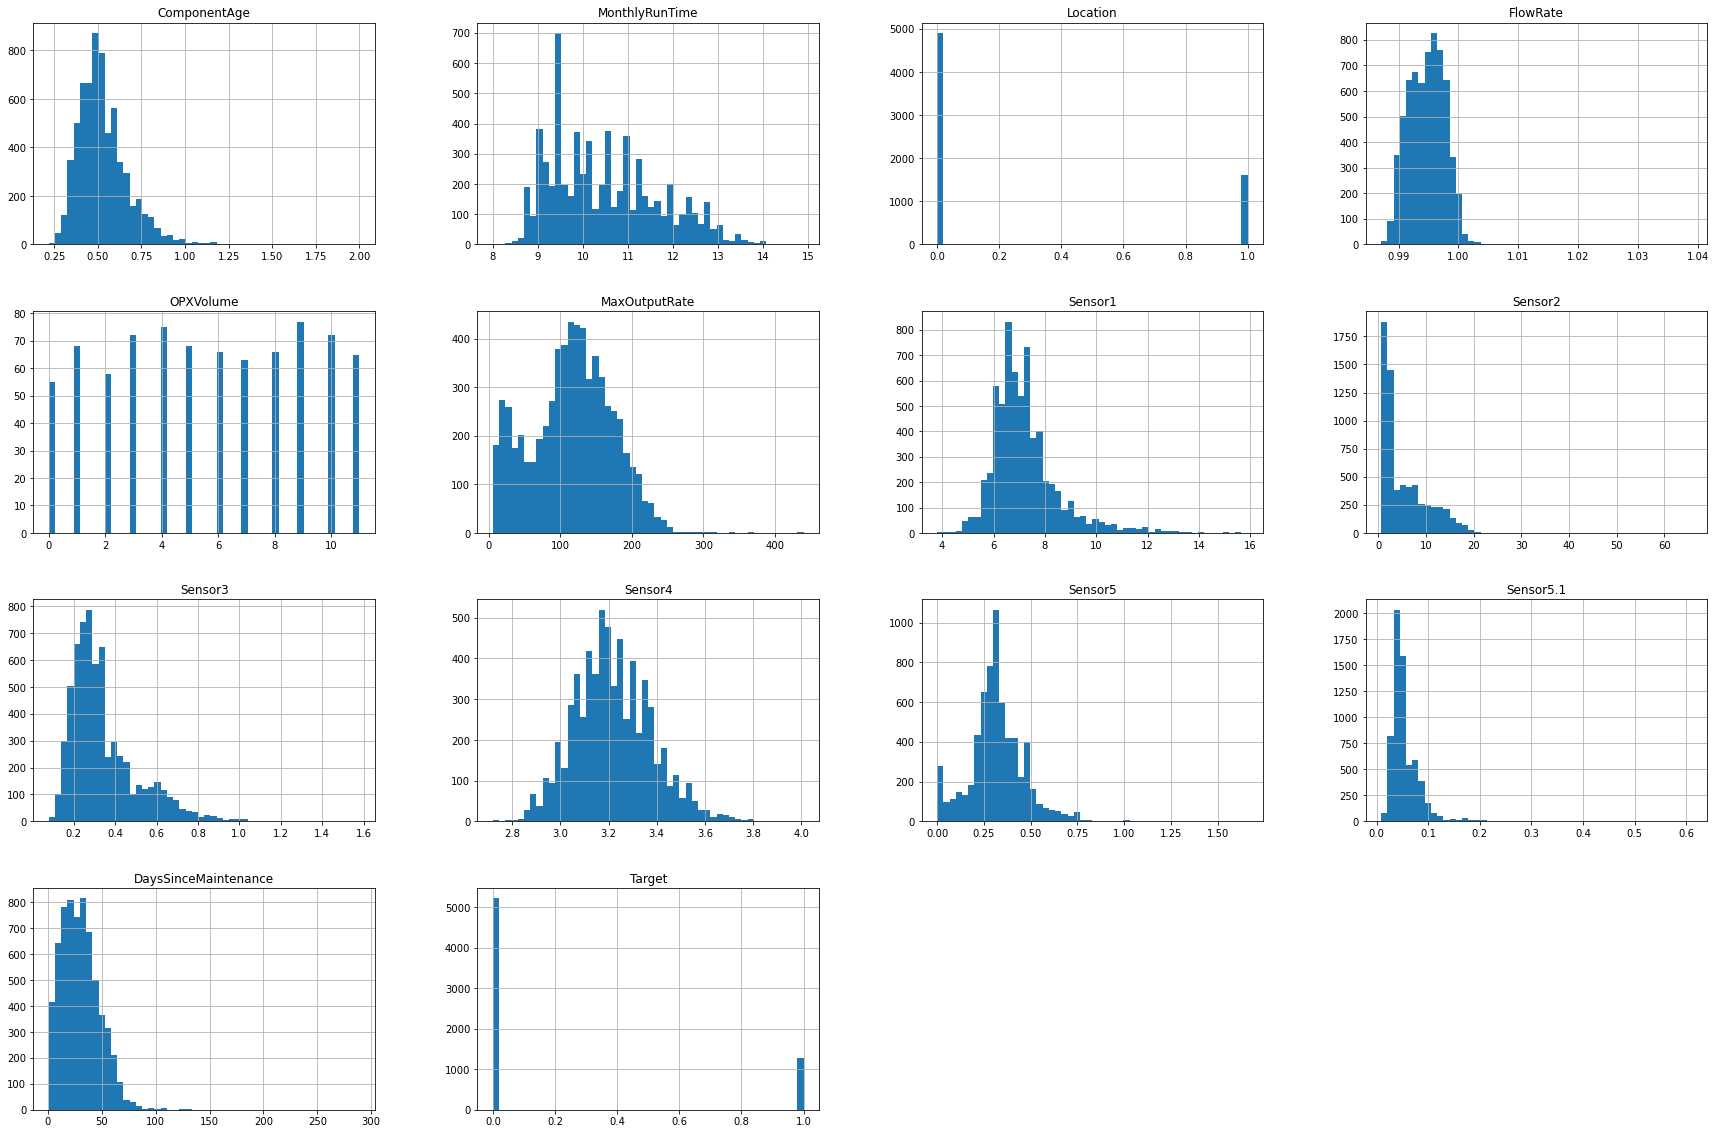

In [14]:
# Let’s look at the histogram
data.hist(bins=50, figsize=(30,20));

<AxesSubplot:>

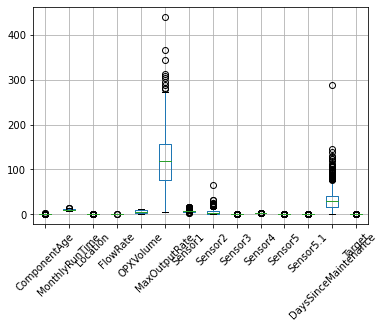

In [15]:
# Just a sample to check extreme values or outliers
# This confirms the presence of extreme values or outliers.
data.boxplot(rot=45)

# Correlation Between Variables

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

<AxesSubplot:>

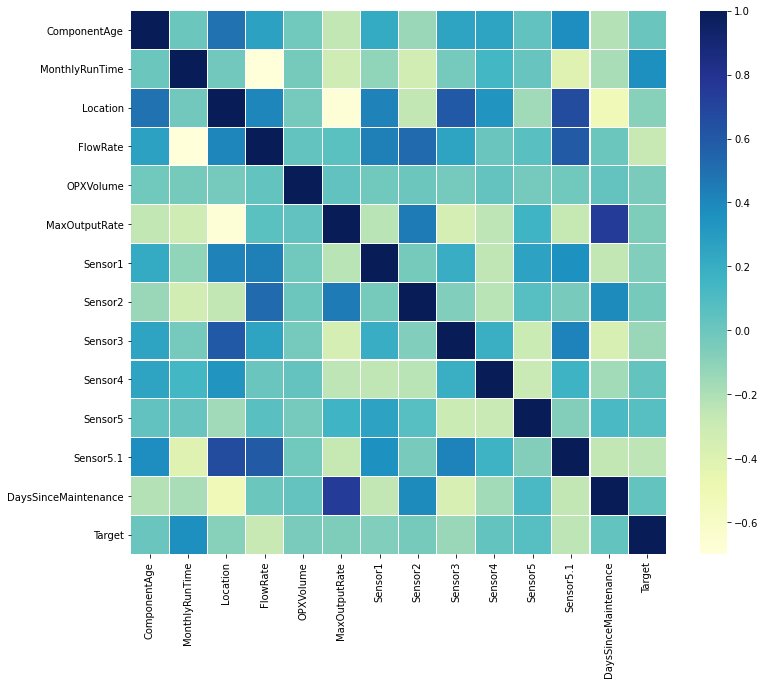

In [24]:
corrmat = data.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

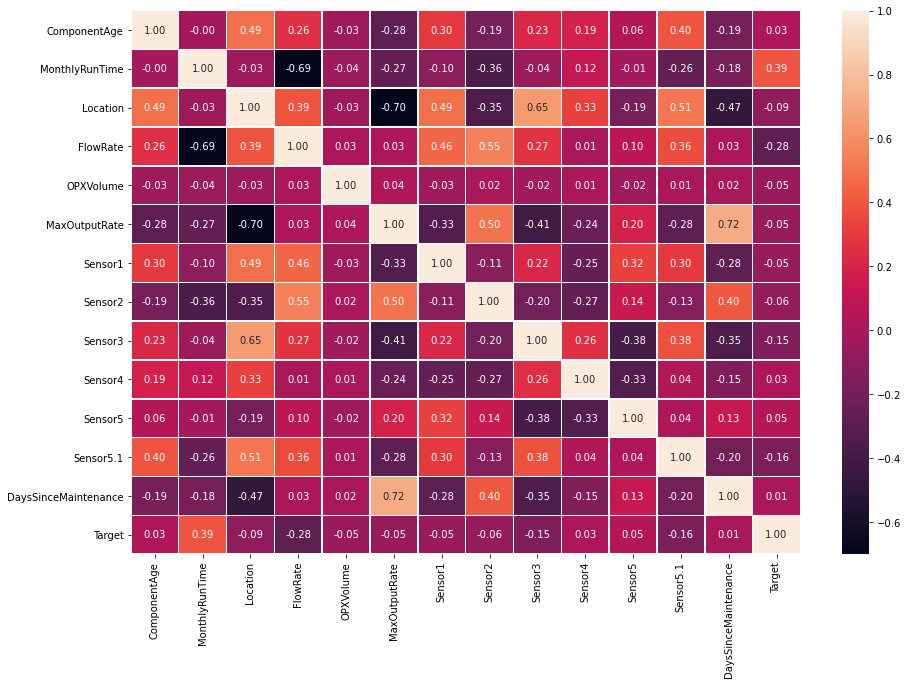

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [26]:
data['Target'].value_counts()

0    5220
1    1277
Name: Target, dtype: int64

In [27]:
countNo = len(data[data.Target == 0])
countHave = len(data[data.Target == 1])
print("Percentage of Target=0: {:.2f}%".format((countNo / (len(data.Target))*100)))
print("Percentage of Target=1: {:.2f}%".format((countHave / (len(data.Target))*100)))

Percentage of Target=0: 80.34%
Percentage of Target=1: 19.66%


### Challenge of Imbalanced Classification

Many of the classification predictive modelling problems that we are interested in solving in practice are imbalanced.

As such, it is surprising that imbalanced classification does not get more attention than it does.

Below is a list of eight examples of problem domains where the class distribution of examples is inherently imbalanced.

- Fraud Detection.
- Claim Prediction
- Churn Prediction.
- Spam Detection.
- Anomaly Detection.
- Outlier Detection.
- Intrusion Detection.
- Conversion Prediction.

#### Imbalanced classification problems are those classification tasks where the distribution of examples across the classes is not equal.

#### Slight Imbalance. Where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6).

#### These problems require specialised techniques including:
- Performance Metrics like F-measure and G-mean.
- Data Sampling like SMOTE and ENN.
- Cost-Sensitive Algorithms like Decision Trees.
- One-Class Algorithms like SVM.
- Post-Processing like Threshold Moving and Calibration.

### from above we have got to understand that high imbalanced data. we need go for SMOTE: oversampling technique

In [28]:
data['ComponentAge'] = data['ComponentAge'].fillna(data['ComponentAge'].mean())
data['OPXVolume'] = data['OPXVolume'].fillna(data['OPXVolume'].mean())
data['Sensor1'] = data['Sensor1'].fillna(data['Sensor1'].mean())
data['Sensor2'] = data['Sensor2'].fillna(data['Sensor2'].mean())
data['Sensor3'] = data['Sensor3'].fillna(data['Sensor3'].mean())
data['Sensor4'] = data['Sensor4'].fillna(data['Sensor4'].mean())
data['Sensor5'] = data['Sensor5'].fillna(data['Sensor5'].mean())
data['Sensor5.1'] = data['Sensor5.1'].fillna(data['Sensor5.1'].mean())

In [29]:
# check again no NULL values
data.isnull().sum()

ComponentAge            0
MonthlyRunTime          0
Location                0
FlowRate                0
OPXVolume               0
MaxOutputRate           0
Sensor1                 0
Sensor2                 0
Sensor3                 0
Sensor4                 0
Sensor5                 0
Sensor5.1               0
DaysSinceMaintenance    0
Target                  0
dtype: int64

In [30]:
# check info again and To get a quick overview of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ComponentAge          6497 non-null   float64
 1   MonthlyRunTime        6497 non-null   float64
 2   Location              6497 non-null   int64  
 3   FlowRate              6497 non-null   float64
 4   OPXVolume             6497 non-null   float64
 5   MaxOutputRate         6497 non-null   float64
 6   Sensor1               6497 non-null   float64
 7   Sensor2               6497 non-null   float64
 8   Sensor3               6497 non-null   float64
 9   Sensor4               6497 non-null   float64
 10  Sensor5               6497 non-null   float64
 11  Sensor5.1             6497 non-null   float64
 12  DaysSinceMaintenance  6497 non-null   float64
 13  Target                6497 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 710.7 KB


In [31]:
X = np.array(data.loc[:, data.columns != 'Target'])
y = np.array(data.loc[:, data.columns == 'Target'])

## our data is Imbalanced Dataset

In [32]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


### split the dataset to train 70% and test 30%

In [33]:
import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number target X_train dataset: ", X_train.shape)
print("Number target y_train dataset: ", y_train.shape)
print("Number target X_test dataset: ", X_test.shape)
print("Number target y_test dataset: ", y_test.shape)

Number target X_train dataset:  (4547, 13)
Number target y_train dataset:  (4547, 1)
Number target X_test dataset:  (1950, 13)
Number target y_test dataset:  (1950, 1)


### Overcoming Imbalanced Dataset using SMOTE Technique

### using SMOTE: oversampling technique

In [34]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [880]
Before OverSampling, counts of label '0': [3667] 

After OverSampling, the shape of train_X: (7334, 13)
After OverSampling, the shape of train_y: (7334,) 

After OverSampling, counts of label '1': 3667
After OverSampling, counts of label '0': 3667


### Most machine learning algorithms and performance metrics assume an equal number of examples in each class.

### If you use standard methods for imbalanced classification, you will get poor results or even results that look good, but are dangerously misleading (e.g. classification accuracy).

In [35]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,plot_roc_curve

# Machine Learning

# Logistic Regression


In [36]:
lr=LogisticRegression()

In [37]:
lr.fit(X_train_res, y_train_res)

C:\Users\emma_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
lr.score(X_train_res, y_train_res)

0.7338423779656394

In [39]:
lr_y_preds=lr.predict(X_test)

In [40]:
lr.score(X_test,y_test)

0.7266666666666667

In [41]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1553
           1       0.40      0.71      0.51       397

    accuracy                           0.73      1950
   macro avg       0.65      0.72      0.66      1950
weighted avg       0.80      0.73      0.75      1950




# K-Nearest Neighbour

In [42]:
knn=KNeighborsClassifier()

In [43]:
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [44]:
knn.score(X_train_res, y_train_res)

0.8869648213798745

In [45]:
knn_y_preds=knn.predict(X_test)

In [46]:
knn.score(X_test,y_test)

0.7148717948717949

In [47]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1553
           1       0.39      0.70      0.50       397

    accuracy                           0.71      1950
   macro avg       0.65      0.71      0.65      1950
weighted avg       0.80      0.71      0.74      1950



# Random Forest


In [48]:
rf=RandomForestClassifier()

In [49]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [50]:
rf.score(X_train_res, y_train_res)

1.0

In [51]:
rf_y_preds=rf.predict(X_test)

In [52]:
rf.score(X_test,y_test)

0.8697435897435898

In [53]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1553
           1       0.66      0.75      0.70       397

    accuracy                           0.87      1950
   macro avg       0.80      0.82      0.81      1950
weighted avg       0.88      0.87      0.87      1950



### Advance Machine Learning-LightGBM Algorithm

### Introduction
- The development of Boosting Machines started from AdaBoost to today’s favorite XGBOOST.

- No doubt, XGBOOST is the most preferred ML Model simply because it is extremely powerful. But given lots and lots of data, even XGBOOST takes a long time to train.

- Here comes LightGBM for rescuse

# LightGBM

In [54]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [55]:
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train_res, y_train_res,verbose=20,eval_metric='logloss')


C:\Users\emma_\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [56]:
model.score(X_train_res, y_train_res)

0.9607308426506681

In [57]:
model_y_preds=model.predict(X_test)

In [58]:
model.score(X_test,y_test)

0.8517948717948718

In [59]:
print(classification_report(y_test,model_y_preds))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1553
           1       0.63      0.68      0.65       397

    accuracy                           0.85      1950
   macro avg       0.77      0.79      0.78      1950
weighted avg       0.86      0.85      0.85      1950



In [60]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN':knn.score(X_test,y_test),
             'Random Forest':rf.score(X_test,y_test),
             'LightGBM':model.score(X_test,y_test)}

In [61]:
model_scores

{'Logistic Regression': 0.7266666666666667,
 'KNN': 0.7148717948717949,
 'Random Forest': 0.8697435897435898,
 'LightGBM': 0.8517948717948718}